# This notebook checks the results after a simulation

## init stuff

In [1]:
import os
import glob
from utils.results_utils import xml2csv_path
import pandas as pd

In [2]:
path = 'Experiment/Results'

In [3]:
if len(glob.glob(f'{path}/*.csv')) < len(glob.glob(f'{path}/*.xml')):
    print('Found fewer csv files than xml files. Converting results')
    xml2csv_path(path)
    print('finished converting')
else:
    print("All files seems converted.")

csv_files = glob.glob(f'{path}/*.csv')

All files seems converted.


## Load csv files

In [4]:
results = pd.read_csv(csv_files[0], sep=';')
results = results[['edge_id', 'interval_begin', 'edge_density', 'edge_occupancy', 'edge_speed', 'edge_waitingTime', 'edge_timeLoss']]

In [5]:
results.head()

,edge_id,interval_begin,edge_density,edge_occupancy,edge_speed,edge_waitingTime,edge_timeLoss
0,E0,0.0,132.08,21.64,3.39,1026.0,3932.76
1,E1,0.0,109.50,18.00,3.04,1883.0,4039.64
2,E10,0.0,NaN,NaN,NaN,NaN,NaN
3,E11,0.0,NaN,NaN,NaN,NaN,NaN
4,E2,0.0,42.06,6.45,6.96,0.0,275.03


In [6]:
results_table = results.pivot(index='edge_id', columns='interval_begin', values=['edge_speed','edge_density'])

In [7]:
results_table.edge_speed

interval_begin,0.0,300.0,600.0,900.0,1200.0,1500.0,1800.0,2100.0,2400.0,2700.0,...,7200.0,7500.0,7800.0,8100.0,8400.0,8700.0,9000.0,9300.0,9600.0,9900.0
edge_id,,,,,,,,,,,,,,,,,,,,,
E0,3.39,1.22,1.58,1.68,1.32,1.50,1.62,1.50,1.61,1.35,...,1.48,1.30,1.54,1.49,1.57,1.43,1.54,1.36,1.78,2.45
E1,3.04,2.47,2.66,2.48,2.15,2.45,2.44,2.40,2.45,2.20,...,2.24,2.14,2.11,2.23,2.33,2.16,2.59,2.11,2.60,2.87
E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E2,6.96,7.00,7.05,7.04,7.01,7.07,7.17,7.03,7.17,7.10,...,6.95,6.97,6.97,7.07,6.90,7.08,7.07,7.03,7.01,7.09
E3,6.97,6.88,6.96,6.93,6.90,6.89,6.89,6.89,6.95,7.04,...,6.92,6.87,6.92,6.99,6.82,6.95,6.88,6.97,6.96,6.89
E4,8.07,8.07,8.02,8.03,8.09,8.07,8.09,8.04,8.07,8.05,...,8.02,7.97,8.05,8.16,8.07,8.04,8.04,8.08,8.07,8.08
E5,7.29,6.56,5.08,5.09,5.37,5.79,5.18,5.21,5.70,5.79,...,5.29,5.79,5.36,5.30,5.74,5.56,5.83,5.48,5.26,5.75
E6,5.05,2.52,2.40,2.49,4.03,2.50,2.31,3.11,2.64,2.94,...,3.48,3.25,3.19,3.20,2.74,2.84,2.24,3.25,2.14,4.37


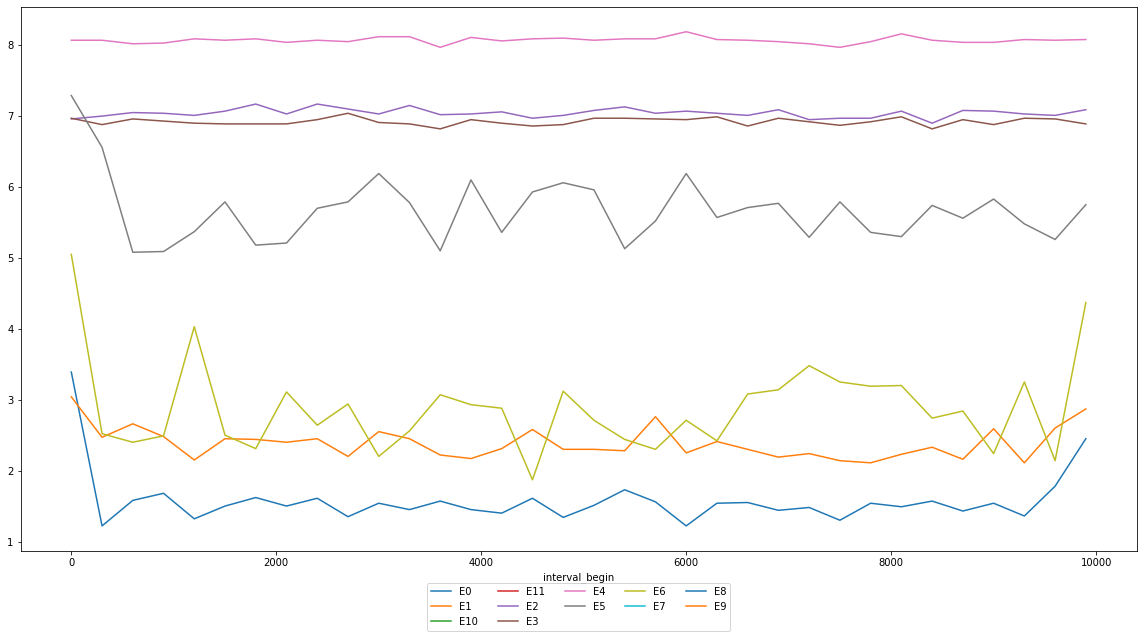

In [8]:
ax = results_table.edge_speed.T.plot(figsize=(20,10))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

In [9]:
results_table.edge_density

interval_begin,0.0,300.0,600.0,900.0,1200.0,1500.0,1800.0,2100.0,2400.0,2700.0,...,7200.0,7500.0,7800.0,8100.0,8400.0,8700.0,9000.0,9300.0,9600.0,9900.0
edge_id,,,,,,,,,,,,,,,,,,,,,
E0,132.08,253.41,224.85,221.98,241.49,233.06,218.70,231.36,228.42,238.58,...,237.63,231.25,234.58,232.30,232.34,233.07,227.39,240.26,215.29,166.43
E1,109.50,135.55,131.95,141.89,154.51,144.29,142.59,141.83,149.66,148.91,...,153.65,155.23,162.04,154.37,151.44,152.89,141.03,153.43,141.46,105.60
E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E2,42.06,50.95,51.38,50.27,51.23,50.72,49.24,51.22,50.15,49.60,...,51.76,51.50,50.56,50.35,52.42,49.17,50.14,51.01,51.04,33.82
E3,40.84,53.33,52.95,52.48,53.09,53.20,52.38,53.59,53.03,50.88,...,53.13,53.32,51.87,52.54,53.97,51.77,52.07,52.76,52.70,37.49
E4,32.74,44.00,45.10,44.12,44.05,44.03,43.88,44.57,44.81,43.26,...,44.14,45.11,43.59,43.74,44.49,43.48,43.56,44.36,44.37,32.88
E5,31.83,52.04,68.76,65.82,65.71,59.40,65.60,67.13,60.84,58.33,...,64.86,61.11,63.52,64.84,60.11,60.99,57.99,63.22,64.39,50.18
E6,39.98,134.27,148.74,141.32,94.37,139.92,147.18,121.60,131.51,124.67,...,102.97,114.58,109.93,110.97,127.19,126.98,151.71,114.76,157.09,81.11


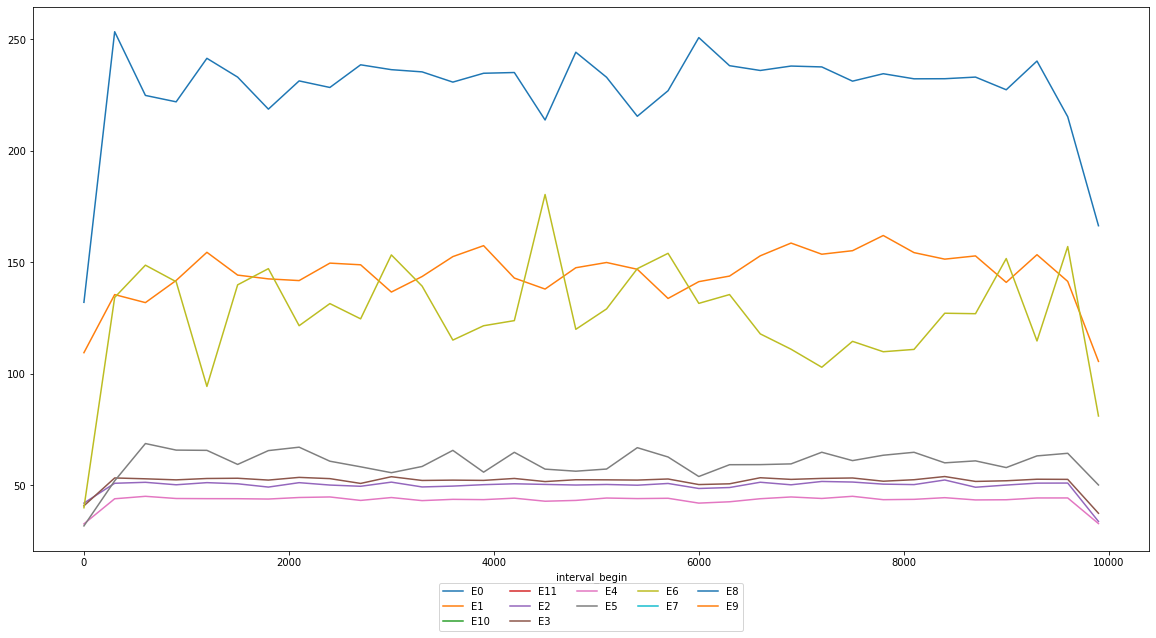

In [10]:
ax = results_table.edge_density.T.plot(figsize=(20,10))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)